In [1]:
!pip install dtreeviz

In [2]:
import graphviz.backend as be

In [3]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image,display_svg,SVG

In [4]:
import dtreeviz

In [5]:
clf=tree.DecisionTreeClassifier(max_depth=2)

iris=load_iris()
x_train=iris.data
y_train=iris.target
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

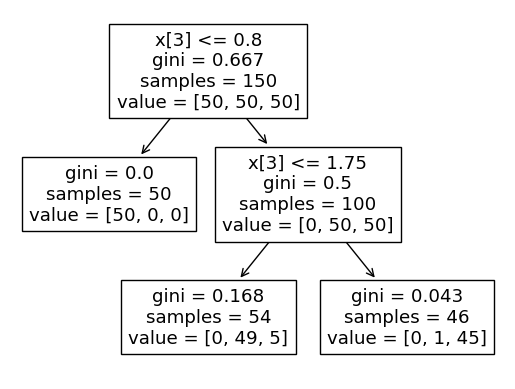

In [6]:
from sklearn.tree import plot_tree
plot_tree(clf)

# 1. Classification

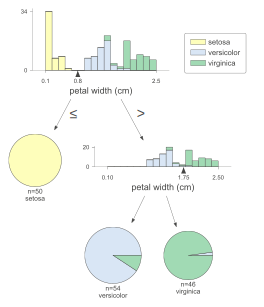

In [7]:
viz = dtreeviz.model(clf,x_train,y_train,feature_names=iris.feature_names,class_names=['setosa','versicolor','virginica'])
viz.view()

In [8]:
clf=tree.DecisionTreeClassifier()

iris=load_iris()
x_train=iris.data
y_train=iris.target
clf.fit(x_train,y_train)

DecisionTreeClassifier()

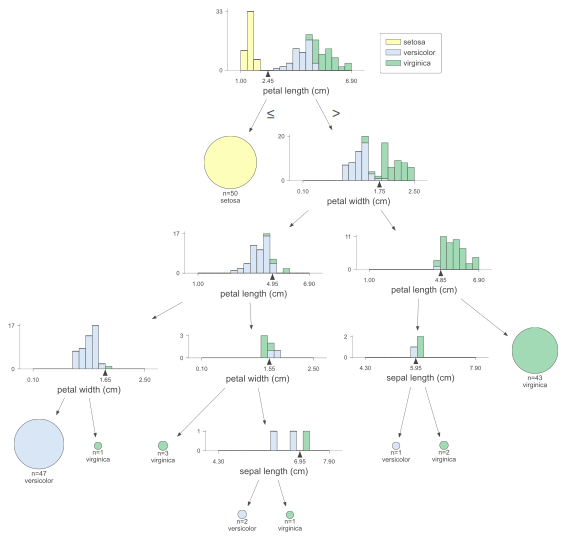

In [9]:
viz = dtreeviz.model(clf,x_train,y_train,feature_names=iris.feature_names,class_names=['setosa','versicolor','virginica'])
viz.view()

# 2. Regression

In [10]:
reg = tree.DecisionTreeRegressor(max_depth=2)
df=pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
x_train=df.iloc[:,0:13]
y_train=df.iloc[:,13]

In [12]:
y_train

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [13]:
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [14]:
reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

c:\Users\MANYA\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


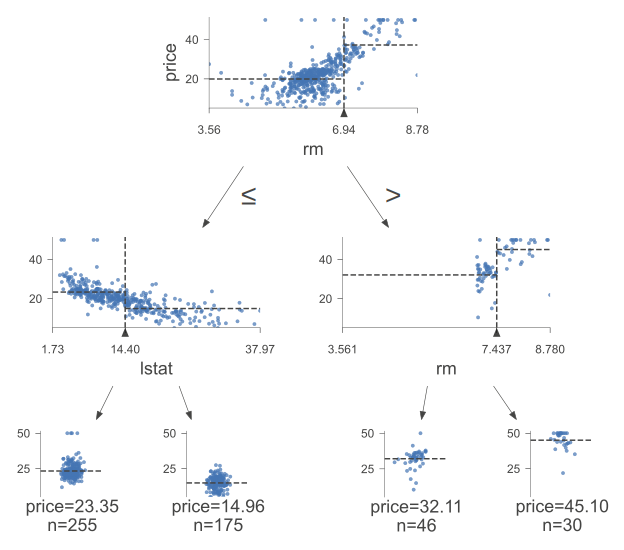

In [15]:
viz= dtreeviz.model(reg,
                    x_train,
                    y_train,
                    target_name='price',
                    feature_names=x_train.columns)
viz.view(scale=2)

# 3. Examinig Leaf Stats

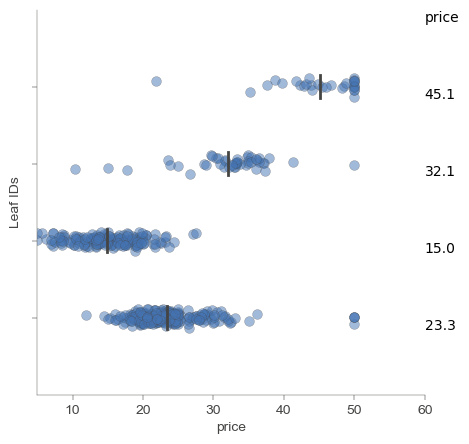

In [16]:
viz.rtree_leaf_distributions(figsize=(5,5))

# 4. Horizontal Decision Tree

c:\Users\MANYA\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


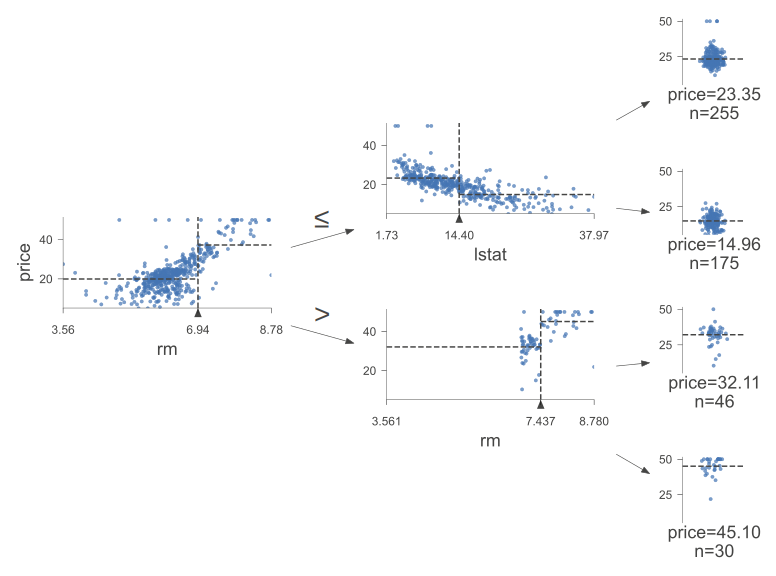

In [17]:
viz= dtreeviz.model(reg,
                    x_train,
                    y_train,
                    target_name='price',
                    feature_names=x_train.columns)
viz.view(scale=2,orientation='LR')

# 5. Show Predicition Path

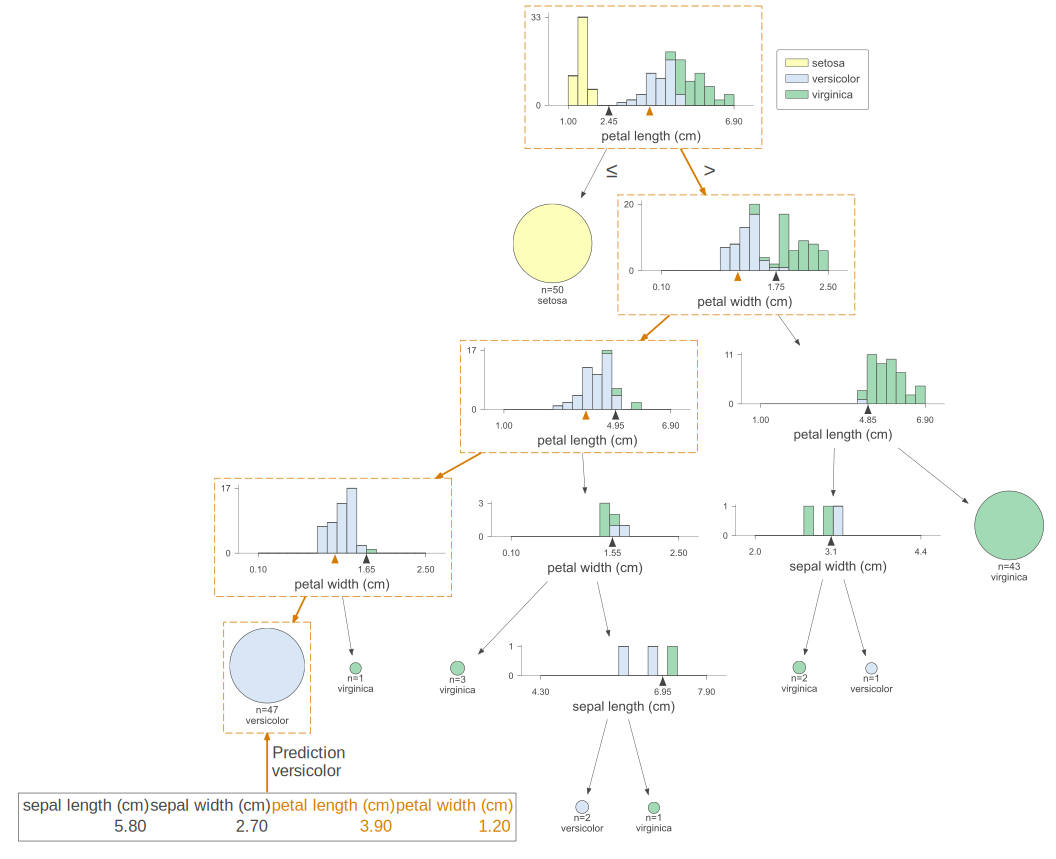

In [18]:
clf=tree.DecisionTreeClassifier()

iris=load_iris()
x_train=iris.data
y_train=iris.target
clf.fit(x_train,y_train)
x=iris.data[np.random.randint(0,len(iris.data)),:]
viz = dtreeviz.model(clf,x_train,y_train,feature_names=iris.feature_names,class_names=['setosa','versicolor','virginica'])
viz.view(x=x,scale=1.5)


# 6. Show Node Number

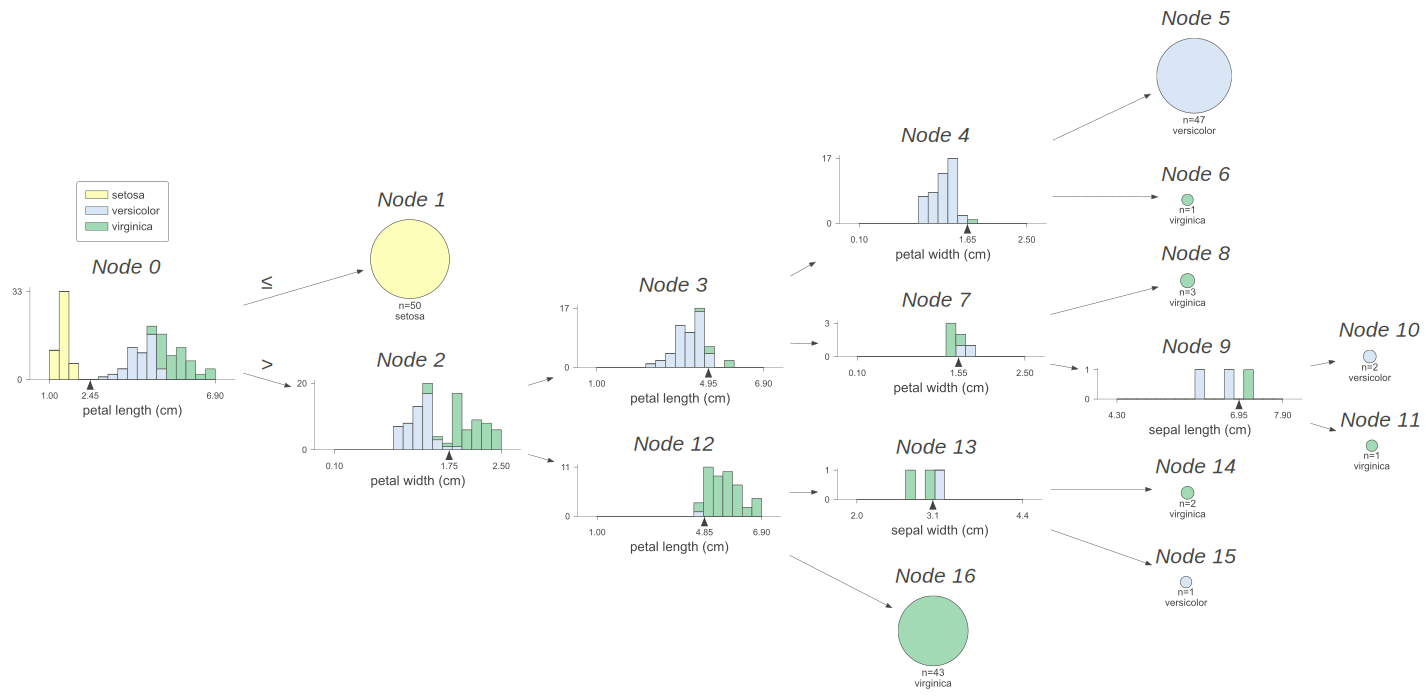

In [19]:
viz.view(orientation='LR',show_node_labels=True,scale=1.5)

# 7. Without the graphs

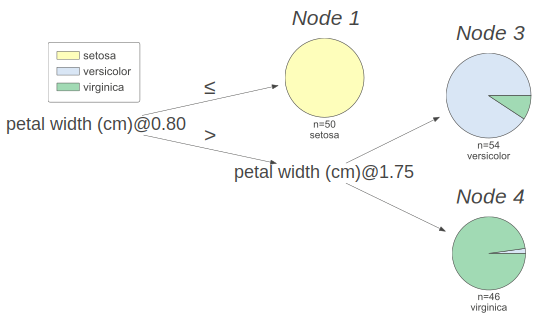

In [20]:
clf=tree.DecisionTreeClassifier(max_depth=2)

iris=load_iris()
x_train=iris.data
y_train=iris.target
clf.fit(x_train,y_train)
x=iris.data[np.random.randint(0,len(iris.data)),:]
viz = dtreeviz.model(clf,x_train,y_train,feature_names=iris.feature_names,class_names=['setosa','versicolor','virginica'])
viz.view(orientation='LR',show_node_labels=True,scale=1.5,fancy=False)

# 8. Show just prediction path

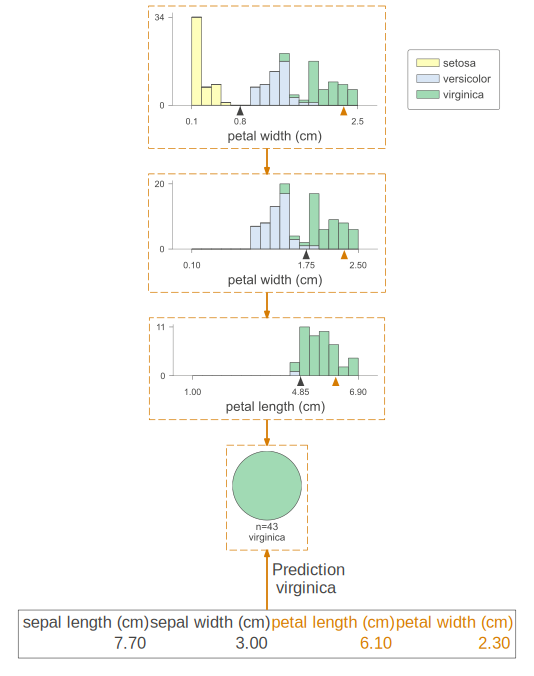

In [21]:
clf=tree.DecisionTreeClassifier()

iris=load_iris()
x_train=iris.data
y_train=iris.target
clf.fit(x_train,y_train)
x=iris.data[np.random.randint(0,len(iris.data)),:]
viz = dtreeviz.model(clf,x_train,y_train,feature_names=iris.feature_names,class_names=['setosa','versicolor','virginica'])
viz.view(x=x,scale=1.5,show_just_path=True)

# 9. Prediction path in plain english

In [22]:
viz.explain_prediction_path(x=x)

'4.85 <= petal length (cm) \n1.75 <= petal width (cm) \n'

# 10. 3D plot

In [33]:
reg = tree.DecisionTreeRegressor(max_depth=2)
df=pd.read_csv('BostonHousing.csv')
x_train=df.iloc[:,0:2]
y_train=df.iloc[:,13]
reg.fit(x_train,y_train)
viz= dtreeviz.model(reg,
                    x_train,
                    y_train,
                    target_name='price',
                    feature_names=x_train.columns)


AttributeError: 'Index' object has no attribute 'index'

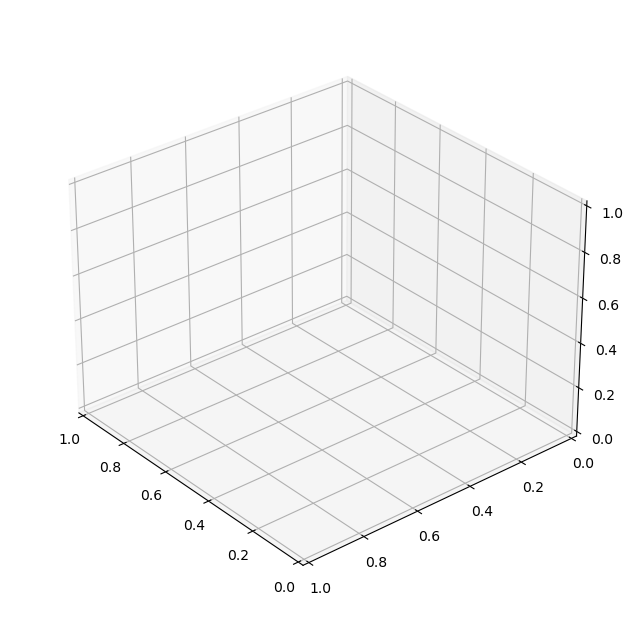

In [34]:
viz.rtree_feature_space3D(features=['crim','zn'],
                              show={'splits'}, elev=30, azim=140, dist=11, figsize=(9,8))